In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import math

### Problem 1.1

In [2]:
X = np.matrix([[0,0,1,1,0,-1],[1,1,0,1,0,-1],[0,1,1,1,1,-1],
               [1,1,1,1,0,-1],[0,1,0,0,0,-1],[1,0,1,1,1, 1],
               [0,0,1,0,0, 1],[1,0,0,0,0, 1],[1,0,1,1,0, 1],
               [1,1,1,1,1,-1]])

In [3]:
def calculate_entropy(value):
    p1 = np.mean(value>0)
    p2 = 1-p1
    if p1 ==0:
        entropy = p2*np.log2(1/p2)
    elif p2==0 :
        entropy = p1*np.log2(1/p1)
    else:
        entropy = p1*np.log2(1/p1)+p2*np.log2(1/p2)
    return entropy

In [4]:
Hy = calculate_entropy(X[:,-1])
print('Entropy of class variable is %0.6f' % Hy)

Entropy of class variable is 0.970951


### Problem 1.2

In [5]:
def calculate_info_gain(feature_index,X,entropy_class,feaure_lst):
    ture_pos = X[:,-1][X[:,feature_index-1]>0]
    entropy_pos = calculate_entropy(ture_pos)
    false_pos = X[:,-1][X[:,feature_index-1]<1]
    entropy_false = calculate_entropy(false_pos)
    p1 = np.mean(X[:,feature_index-1]>0)
    p2 = 1-p1 
    info_gain = p1*(entropy_class-entropy_pos)+p2*(entropy_class-entropy_false)
    print('information gain for feature {} {} is {} \n'.format(feature_index,feaure_lst[feature_index-1],info_gain))
    print('      entropy true  is: {} \n      entropy false is: {} \n'.format((entropy_pos),(entropy_false)))
    return info_gain

In [6]:
feaure_lst = ['know author','is long','has research',
             'has grade','has lottery']
largest_info_index = 0
H = 0
for i in range(1,6):
    H_new = calculate_info_gain(i,X,Hy,feaure_lst);
    if H_new > H:
        H = H_new
        largest_info_index = i
print('largest info index is {}'.format(largest_info_index))

information gain for feature 1 know author is 0.04643934467101556 

      entropy true  is: 1.0 
      entropy false is: 0.8112781244591328 

information gain for feature 2 is long is 0.6099865470109875 

      entropy true  is: 0.0 
      entropy false is: 0.7219280948873623 

information gain for feature 3 has research is 0.005802149014345906 

      entropy true  is: 0.9852281360342514 
      entropy false is: 0.9182958340544893 

information gain for feature 4 has grade is 0.0912774462416802 

      entropy true  is: 0.8631205685666309 
      entropy false is: 0.9182958340544896 

information gain for feature 5 has lottery is 0.0058021490143459024 

      entropy true  is: 0.9182958340544893 
      entropy false is: 0.9852281360342514 

largest info index is 2


I should split feature 2 first, if email is long predict not read

### Problem 1.3 

In [7]:
X = np.matrix([[0,0,1,1,0,-1],[1,1,0,1,0,-1],[0,1,1,1,1,-1],
               [1,1,1,1,0,-1],[0,1,0,0,0,-1],[1,0,1,1,1, 1],
               [0,0,1,0,0, 1],[1,0,0,0,0, 1],[1,0,1,1,0, 1],
               [1,1,1,1,1,-1]])
X_new = np.delete(X,[1,2,3,4,9],0)
X_new

matrix([[ 0,  0,  1,  1,  0, -1],
        [ 1,  0,  1,  1,  1,  1],
        [ 0,  0,  1,  0,  0,  1],
        [ 1,  0,  0,  0,  0,  1],
        [ 1,  0,  1,  1,  0,  1]])

In [8]:
def calculate_info_gain(feature_index,X,entropy_class,feaure_lst):
    ture_pos = X[:,-1][X[:,feature_index-1]>0]
    if ture_pos.size == 0:
        entropy_pos = 0
    else:
        entropy_pos = calculate_entropy(ture_pos)
    false_pos = X[:,-1][X[:,feature_index-1]<1]
    if false_pos.size ==0:
        entropy_false = 0
    else:
        entropy_false = calculate_entropy(false_pos)
    p1 = np.mean(X[:,feature_index-1]>0)
    p2 = 1-p1 
    info_gain = p1*(entropy_class-entropy_pos)+p2*(entropy_class-entropy_false)
    print('information gain for new feature {} {} is {} \n'.format(feature_index,feaure_lst[feature_index-1],info_gain))
    print('      entropy true  is: {} \n      entropy false is: {} \n'.format((entropy_pos),(entropy_false)))
    return info_gain

feaure_lst = ['know author','has research',
             'has grade','has lottery']
largest_info_index = 0
Hy = calculate_entropy(X[[0,5,3,7,8],-1])
H = 0
for i in range(1,5):
    H_new = calculate_info_gain(i,X_new,Hy,feaure_lst);
    if H_new > H:
        H = H_new
        largest_info_index = i
print('largest info index is new/old feature {}'.format(largest_info_index))

information gain for new feature 1 know author is 0.5709505944546687 

      entropy true  is: 0.0 
      entropy false is: 1.0 

information gain for new feature 2 has research is 0.24902249956730638 

      entropy true  is: 0 
      entropy false is: 0.7219280948873623 

information gain for new feature 3 has grade is 0.3219280948873624 

      entropy true  is: 0.8112781244591328 
      entropy false is: 0.0 

information gain for new feature 4 has lottery is 0.41997309402197497 

      entropy true  is: 0.9182958340544896 
      entropy false is: 0.0 

largest info index is new/old feature 1


## Decision Tree

In [9]:
X_new_new = np.delete(X_new,[1,3,4],0)
X_new_new = np.delete(X_new_new,[0,1],1)
X_new_new

matrix([[ 1,  1,  0, -1],
        [ 1,  0,  0,  1]])



Complete Desicion Tree


if X2( is long?) is True:

    predict Not Read (since entropy is zero)
    
elif X2 is False:

    if X1(know author?) is True: 
    
        predict Read 
        
    elif X1 is False: 
        # (note that we only have two raws now as X_new_new shows)
        if X4 (has grade) is True:
        
            predict not read
            
        elif X4  (has grade) is False:
        
            predict read


if X2 == 1:

    Y = 0
    
else:

    if X1 == 1:
    
        Y = 1
        
    else:
    
        if X4 == 1:
        
            Y = 0
            
        else:
        
            Y = 1

### Problem 2.1

In [2]:
import mltools as ml

In [3]:
X = np.genfromtxt('data/X_train.txt',delimiter=None)
Y = np.genfromtxt('data/Y_train.txt',delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [4]:
for i in range(X.shape[1]):
    print("feature {} minimum  is {}".format(i+1,np.min(X[:,i])))
    print("feature {} maximum  is {}".format(i+1,np.max(X[:,i])))
    print("feature {} mean     is {}".format(i+1,np.mean(X[:,i])))
    print("feature {} variance is {}\n".format(i+1,np.var(X[:,i])))

feature 1 minimum  is 197.0
feature 1 maximum  is 253.0
feature 1 mean     is 241.89897349999998
feature 1 variance is 81.19881598129776

feature 2 minimum  is 190.0
feature 2 maximum  is 248.0
feature 2 mean     is 228.38130700000002
feature 2 variance is 89.150265341751

feature 3 minimum  is 214.97
feature 3 maximum  is 252.02
feature 3 mean     is 241.90593450000003
feature 3 variance is 34.55774434670975

feature 4 minimum  is 205.42
feature 4 maximum  is 252.02
feature 4 mean     is 233.8253765
feature 4 variance is 94.50721140824776

feature 5 minimum  is 10.0
feature 5 maximum  is 17130.0
feature 5 mean     is 2849.0465
feature 5 variance is 10505588.300637748

feature 6 minimum  is 0.0
feature 6 maximum  is 12338.0
feature 6 mean     is 862.8611
feature 6 variance is 3090415.2075067903

feature 7 minimum  is 0.0
feature 7 maximum  is 9238.0
feature 7 mean     is 163.65265
feature 7 variance is 698073.3556979776

feature 8 minimum  is 0.0
feature 8 maximum  is 27.419
feature 8 

In [14]:
import pandas as pd
import os
new_dataframe = pd.DataFrame(
    {
        "feature index" :range(1,15),
        "minimum":np.min(X,0),
        "maximum":np.max(X,0),
        "mean":np.mean(X,0),
        "var": np.var(X,0)  
    },
    index = ['']*len(X[0])
)
new_dataframe

,feature index,minimum,maximum,mean,var
,1,197.0000,253.000,241.898974,8.119882e+01
,2,190.0000,248.000,228.381307,8.915027e+01
,3,214.9700,252.020,241.905935,3.455774e+01
,4,205.4200,252.020,233.825377,9.450721e+01
,5,10.0000,17130.000,2849.046500,1.050559e+07
,6,0.0000,12338.000,862.861100,3.090415e+06
,7,0.0000,9238.000,163.652650,6.980734e+05
,8,0.0000,27.419,3.055755,7.276891e+00
,9,1.2189,18.107,6.311442,6.183003e+00
,10,0.0000,11.368,1.893915,4.150932e+00


### Problem 2.2 

In [14]:
Xtr = X[:10000] # shuffled
Ytr = Y[:10000]
Xva = X[10000:20000]
Yva = Y[10000:20000]
learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50)

In [15]:
print('Depth 50 Training   error is:  {}'.format(learner.err(Xtr,Ytr)))
print('Depth 50 Validation error is:  {}'.format(learner.err(Xva,Yva)))

Depth 50 Training   error is:  0.011
Depth 50 Validation error is:  0.3768


### Problem 2.3

In [32]:
n = 16
Train_err_lst = np.zeros(len(range(0,n)))
Vladi_err_lst = np.zeros(len(range(0,n)))

In [33]:
for i in range(len(range(0,n))):
    learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=i)
    Train_err_lst[i]=learner.err(Xtr,Ytr)
    Vladi_err_lst[i]=learner.err(Xva,Yva)

Text(0.5,1,'Error Rates versus maxDepth')

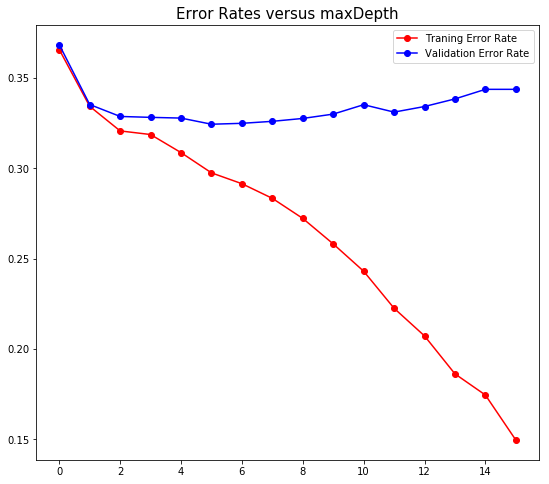

In [34]:
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(0,n),Train_err_lst,'ro-')
ax.plot(range(0,n),Vladi_err_lst,'bo-')
ax.legend(["Traning Error Rate","Validation Error Rate"])
ax.set_title("Error Rates versus maxDepth",fontsize=15)

Model with higer maxDepth has higher complexity.

Based on the Validation error MaxDepth = 5 gives the best decision tree model for value range 0,1,2, ..., 15

### Problem 2.4 

In [46]:
n = 11
Train_err_lst_pa = np.zeros(len(range(0,n)))
Vladi_err_lst_pa = np.zeros(len(range(0,n)))

for i in range(len(range(0,n))):
    learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50,minParent = 2**(i+2))
    Train_err_lst_pa[i]=learner.err(Xtr,Ytr)
    Vladi_err_lst_pa[i]=learner.err(Xva,Yva)

Text(0,0.5,'Error Rate')

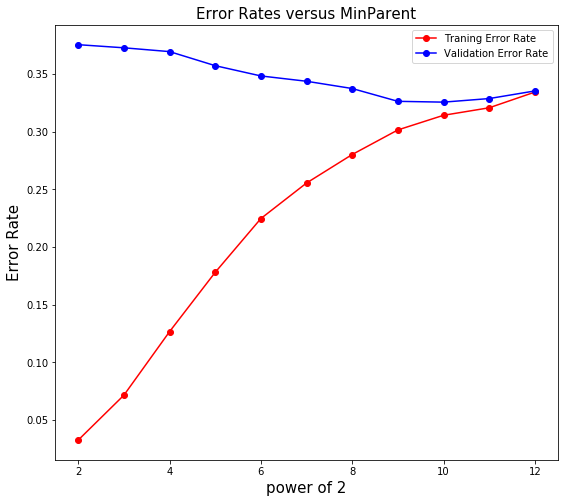

In [47]:
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(2,n+2),Train_err_lst_pa,'ro-')
ax.plot(range(2,n+2),Vladi_err_lst_pa,'bo-')
ax.legend(["Traning Error Rate","Validation Error Rate"])
ax.set_title("Error Rates versus MinParent",fontsize=15)
plt.xlabel("power of 2",fontsize=15)
plt.ylabel("Error Rate",fontsize=15)

Models with higher minParent has lower complexity.

I will choose minParent = 2^10 for the least validation error as the best decision tree model.

### Problem 2.5 

Text(0,0.5,'Error Rate')

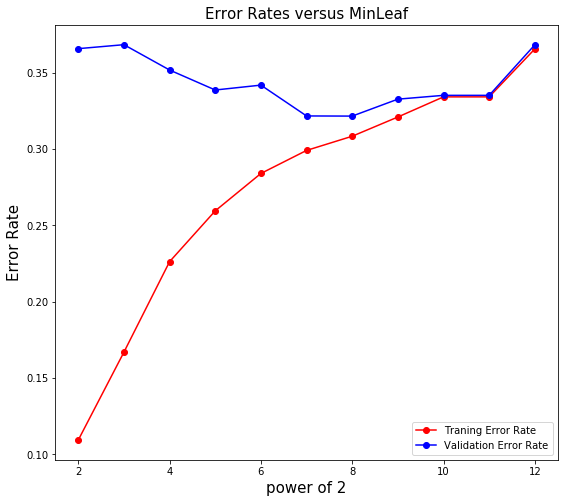

In [49]:
n = 11
Train_err_lst_le = np.zeros(len(range(0,n)))
Vladi_err_lst_le = np.zeros(len(range(0,n)))

for i in range(len(range(0,n))):
    learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50,minLeaf = 2**(i+2))
    Train_err_lst_le[i]=learner.err(Xtr,Ytr)
    Vladi_err_lst_le[i]=learner.err(Xva,Yva)
    
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(2,n+2),Train_err_lst_le,'ro-')
ax.plot(range(2,n+2),Vladi_err_lst_le,'bo-')
ax.legend(["Traning Error Rate","Validation Error Rate"])
ax.set_title("Error Rates versus MinLeaf",fontsize=15)
plt.xlabel("power of 2",fontsize=15)
plt.ylabel("Error Rate",fontsize=15)

MiniLeaf has smaller value than minParent to get best decision

### Problem 2.6 

In [53]:
print("Minumum for Depth     control is :{}".format(np.min(Vladi_err_lst)))
print("Minumum for MinParent control is :{}".format(np.min(Vladi_err_lst_pa)))
print("Minumum for MinLeaf   control is :{}".format(np.min(Vladi_err_lst_le)))


Minumum for Depth     control is :0.3244
Minumum for MinParent control is :0.3256
Minumum for MinLeaf   control is :0.3217


Best Train Model is from MinLeaf = 2**8

In [57]:
np.argwhere(Vladi_err_lst_le==np.min(Vladi_err_lst_le))

array([[6]], dtype=int64)

In [61]:
learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50,minLeaf = 2**8)
fpr, tpr, tnr = learner.roc(Xtr, Ytr)

Text(0.5,1,'ROC function for Training Data')

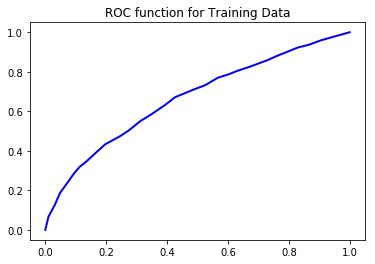

In [69]:
plt.plot(fpr, tpr, 'b-', linewidth = 2)
plt.title("ROC function for Training Data")

Text(0.5,1,'ROC function for Validation Data')

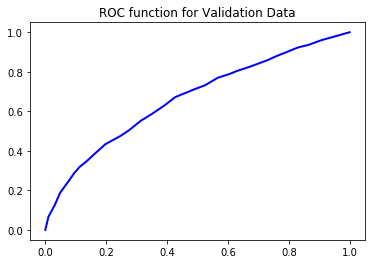

In [70]:
fpr, tpr, tnr = learner.roc(Xva, Yva)
plt.plot(fpr, tpr, 'b-', linewidth = 2)
plt.title("ROC function for Validation Data")

In [71]:
print("AUC score for training   data is {}".format(learner.auc(Xtr, Ytr)))
print("AUC score for Validation data is {}".format(learner.auc(Xva, Yva)))

AUC score for training   data is 0.6991335188883803
AUC score for Validation data is 0.6645674446573823


### Problem 2.7

In [79]:
learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=5,minParent =2 )
learner.err(Xtr,Ytr)
learner.err(Xva,Yva)

0.3244

In [82]:
X = np.genfromtxt('data/X_train.txt',delimiter=None)
Y = np.genfromtxt('data/Y_train.txt',delimiter=None)
X,Y = ml.shuffleData(X,Y)
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.9)

In [83]:
learner = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=5,minParent =2 )

Text(0.5,1,'ROC function for Validation Data')

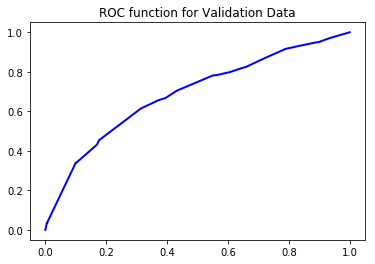

In [85]:
fpr, tpr, tnr = learner.roc(Xte, Yte)
plt.plot(fpr, tpr, 'b-', linewidth = 2)
plt.title("ROC function for Validation Data")

In [86]:
print("AUC score for Test data is {}".format(learner.auc(Xte, Yte)))

AUC score for Test data is 0.690692100951067


## Random Forests

### Problem 3.1.1 

In [153]:
X = np.genfromtxt('data/X_train.txt',delimiter=None)
Y = np.genfromtxt('data/Y_train.txt',delimiter=None)
X,Y = ml.shuffleData(X,Y)
Xt ,Xte,Yt ,Yte = ml.splitData(X, Y, 0.9)
Xtr,Xva,Ytr,Yva = ml.splitData(Xt,Yt,0.75)
m,n = Xtr.shape

In [154]:
nBag = 25
classifiers = [None]*nBag
for i in range(nBag):
    # ind = np.floor(m*np.random.rand(nUse)).astype(int)
    Xi,Yi = ml.bootstrapData(Xtr,Ytr,n_boot=4000)
    classifiers[i] = ml.dtree.treeClassify(Xi,Yi,maxDepth=16,minLeaf=4,nFeatures=8)

In [111]:
np.unique(Yte)

array([0., 1.])

In [162]:
mva = Xva.shape[0]
mtr = Xtr.shape[0]
predict_va = np.zeros((mva,nBag))
predict_tr = np.zeros((mtr,nBag))
for i in range(nBag):
    predict_va[:,i]=classifiers[i].predict(Xva)
    predict_tr[:,i]=classifiers[i].predict(Xtr)

In [167]:
ensemble_num = range(0,26)
err_va = [None]*len(ensemble_num)
err_tr = [None]*len(ensemble_num)
for i,num in enumerate(ensemble_num):
    predicti  = np.mean(predict_va[:,0:num],axis=1)>0.5
    err_va[i] = np.mean(predicti.reshape(Yva.shape)!=Yva)
    predicti  = np.mean(predict_tr[:,0:num],axis=1)>0.5
    err_tr[i] = np.mean(predicti.reshape(Ytr.shape)!=Ytr)

C:\Users\Yushang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Yushang\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Yushang\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\Users\Yushang\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


### Problem 3.2

Text(0,0.5,'Error Rate')

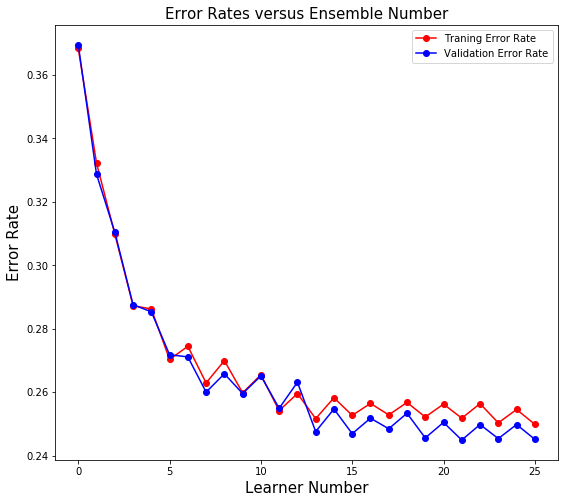

In [168]:
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(ensemble_num,err_tr,'ro-')
ax.plot(ensemble_num,err_va,'bo-')
ax.legend(["Traning Error Rate","Validation Error Rate"])
ax.set_title("Error Rates versus Ensemble Number",fontsize=15)
plt.xlabel("Learner Number",fontsize=15)
plt.ylabel("Error Rate",fontsize=15)

### Problem 3.3

In [176]:
min_index = ensemble_num[np.argwhere(err_va==np.min(err_va)).flatten()[0]]
min_index

21

In [192]:
Xi = Xtr[0:13500]
Yi = Ytr[0:13500]
nBag = min_index
classifiers = [None]*nBag
for i in range(nBag):
    # ind = np.floor(m*np.random.rand(nUse)).astype(int)
    Xi,Yi = ml.bootstrapData(X,Y,n_boot=4000)
    classifiers[i] = ml.dtree.treeClassify(Xi,Yi,maxDepth=16,minLeaf=4,nFeatures=8)
mte = Xte.shape[0]
predict_te = np.zeros((mte,nBag))
for i in range(nBag):
    predict_te[:,i]=classifiers[i].predict(Xte)
predict_te  = np.mean(predict_te,axis=1)>0.5
err_te = np.mean(predict_te.reshape(Yte.shape)!=Yte)

Using 10k training data with ensmble size 0.251 


In [196]:
print(" Using 10k training data with ensmble size {}\n test error is: {} ".format(min_index,err_te))

 Using 10k training data with ensmble size 21
 test error is: 0.251 


This error rate is much smaller than that we got in Problem 2

## Option 1 end

In [2]:
#X = np.genfromtxt('data/X_train.txt',delimiter=None)
#Y = np.genfromtxt('data/Y_train.txt',delimiter=None)
#X,Y = ml.shuffleData(X,Y)
#Xt ,Xte,Yt ,Yte = ml.splitData(X, Y, 0.9)
#Xtr,Xva,Ytr,Yva = ml.splitData(Xt,Yt,0.75)
#m,n = Xtr.shape

Modify TreeBase

 def train(self, X, Y, minParent=2, maxDepth=np.inf, minLeaf=1, nFeatures=None):
 
 -> 
 
  def train(self, X, Y, minParent=2, maxDepth=3, minLeaf=1, nFeatures=None):

In [37]:
#from numpy import asarray as arr

#def delt(Xc):
#    return arr(1/(1+np.exp(-Xc)))
#def regressor(learner,Xtr,Ytr):
#    Xc = learner.predict(Xtr)
#    dY = np.zeros(Ytr.shape)
#   dY[Ytr==1] =1-delt(Xc[Ytr==1])
#    dY[Ytr!=1] = -delt(Xc[Ytr!=1])
#    return dY

In [41]:
#nBoost = 25
#learner = [None]*nBoost
#alpha = [1.0] *nBoost

#dY = Ytr-Ytr
#dY = 1/(1+np.exp(dY))
#
#for k in range(nBoost):
#    learner[k]=ml.dtree.treeRegress(Xtr,dY)
#    alpha[k] =1.0
 #   dY = dY -alpha[k]*learner[k].predict(Xtr)

### Problem 4

I did this hw independently